# TAXONOMICAL CLASSIFICATION OF BIRD ORDERS
Student Name: Arif Çakır

E-mail: cakirar19@itu.edu.tr

Student Number: 090190355

## Importing Necessary Libraries 

In [191]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import colorcet as cc
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm

## Data Preparation and Pre-analysis
In this part, dataset is imported from datadryad.org, and then prepared for analysis.

In [192]:
df = pd.read_excel("https://datadryad.org/stash/downloads/file_stream/401942").dropna()
df.head()   

,class,order,family,genus,spp,species,clutch.size,max.longevity,incubation,dev.mode,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin,qc,sample.size,references
1,Aves,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,SA,32.00,4.86920,40.00,452.000,wild,acceptable,medium,"1, 2 & 3"
2,Aves,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,SA,41.65,8.16368,58.00,988.750,wild,acceptable,medium,"1, 2 & 3"
3,Aves,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,SA,24.25,2.31028,19.30,138.500,wild,acceptable,medium,"1, 2 & 3"
5,Aves,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,A,16.00,0.94276,3.15,30.175,wild,acceptable,medium,"1, 2 & 3"
6,Aves,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,A,13.50,0.46620,1.65,11.900,wild,acceptable,medium,"1, 2 & 3"


Due to "references", "sample.size" and "qc" columns are being not relevant to the project, they are dropped from the dataset. Also, rows with questionable, low or high quality control score ("qc" column) are removed from the dataset. 

In [193]:
df = df[df["qc"]== "acceptable"].drop(["references","sample.size","qc"],axis=1) 
#only took acceptable rows and dropped irrelevant parts from dataset
df.head()

,class,order,family,genus,spp,species,clutch.size,max.longevity,incubation,dev.mode,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin
1,Aves,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,SA,32.00,4.86920,40.00,452.000,wild
2,Aves,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,SA,41.65,8.16368,58.00,988.750,wild
3,Aves,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,SA,24.25,2.31028,19.30,138.500,wild
5,Aves,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,A,16.00,0.94276,3.15,30.175,wild
6,Aves,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,A,13.50,0.46620,1.65,11.900,wild


Gathering statistical information:

In [194]:
df.describe()

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.078823,21.104239,22.679160,35.863940,4.500832,33.081590,648.917593
std,2.088563,13.989003,10.069559,25.808779,5.088058,49.867546,1315.777309
min,1.000000,3.000000,10.500000,8.500000,0.155400,0.500000,3.142500
25%,2.750000,11.000000,14.000000,16.387500,0.991837,3.168750,34.975000
50%,4.000000,18.000000,21.325000,29.250000,2.481220,12.450000,132.875000
75%,4.900000,26.700000,28.000000,46.000000,5.959590,44.625000,696.234408
max,14.000000,120.000000,72.000000,180.000000,32.696160,331.000000,10500.000000


In [195]:
df.info()     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 619
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            500 non-null    object 
 1   order            500 non-null    object 
 2   family           500 non-null    object 
 3   genus            500 non-null    object 
 4   spp              500 non-null    object 
 5   species          500 non-null    object 
 6   clutch.size      500 non-null    float64
 7   max.longevity    500 non-null    float64
 8   incubation       500 non-null    float64
 9   dev.mode         500 non-null    object 
 10  fledging.age     500 non-null    float64
 11  brain.mass       500 non-null    float64
 12  egg.mass         500 non-null    float64
 13  body.mass        500 non-null    float64
 14  specimen.origin  500 non-null    object 
dtypes: float64(7), object(8)
memory usage: 62.5+ KB


In [196]:
df.nunique()

class                1
order               27
family              98
genus              329
spp                439
species            500
clutch.size        170
max.longevity      293
incubation         146
dev.mode             4
fledging.age       198
brain.mass         367
egg.mass           392
body.mass          474
specimen.origin      3
dtype: int64

column named "class" is dropped from dataset due to the fact that all birds are a "bird".

In [197]:
df = df.drop("class",axis=1)
df

,order,family,genus,spp,species,clutch.size,max.longevity,incubation,dev.mode,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin
1,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,SA,32.00,4.86920,40.000,452.000000,wild
2,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,SA,41.65,8.16368,58.000,988.750000,wild
3,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,SA,24.25,2.31028,19.300,138.500000,wild
5,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,A,16.00,0.94276,3.150,30.175000,wild
6,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,A,13.50,0.46620,1.650,11.900000,wild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Passeriformes,Emberizidae,Zonotrichia,albicollis,Zonotrichia_albicollis,4.07,14.916667,13.00,A,10.00,1.08780,2.770,25.350000,wild
616,Passeriformes,Emberizidae,Zonotrichia,leucophrys,Zonotrichia_leucophrys,3.95,13.340000,12.60,A,10.00,1.00492,2.830,27.960000,wild
617,Passeriformes,Turdidae,Zoothera,naevia,Zoothera_naevia,3.00,5.600000,14.00,A,14.00,1.77156,7.300,79.225000,wild
618,Passeriformes,Zosteropidae,Zosterops,japonicus,Zosterops_japonicus,3.15,5.100000,11.00,A,10.00,0.55944,1.130,11.250000,wild


"specimen.origin" and "dev.mode" are logistic variables, because of that they got one hot encoded.

In [198]:
df = pd.get_dummies(df,columns = ["specimen.origin","dev.mode"])
df

,order,family,genus,spp,species,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,32.00,4.86920,40.000,452.000000,0,0,1,0,0,1,0
2,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,41.65,8.16368,58.000,988.750000,0,0,1,0,0,1,0
3,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,24.25,2.31028,19.300,138.500000,0,0,1,0,0,1,0
5,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,16.00,0.94276,3.150,30.175000,0,0,1,1,0,0,0
6,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,13.50,0.46620,1.650,11.900000,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Passeriformes,Emberizidae,Zonotrichia,albicollis,Zonotrichia_albicollis,4.07,14.916667,13.00,10.00,1.08780,2.770,25.350000,0,0,1,1,0,0,0
616,Passeriformes,Emberizidae,Zonotrichia,leucophrys,Zonotrichia_leucophrys,3.95,13.340000,12.60,10.00,1.00492,2.830,27.960000,0,0,1,1,0,0,0
617,Passeriformes,Turdidae,Zoothera,naevia,Zoothera_naevia,3.00,5.600000,14.00,14.00,1.77156,7.300,79.225000,0,0,1,1,0,0,0
618,Passeriformes,Zosteropidae,Zosterops,japonicus,Zosterops_japonicus,3.15,5.100000,11.00,10.00,0.55944,1.130,11.250000,0,0,1,1,0,0,0


## Hierarchial Clustering and SVM

### 2.1: Hierarchial Clustering

In [199]:

dfh = df.iloc[:,5:] # Prepared dataset for hierarchial clustering, removed clusters. 
dfh

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,4.35,20.333333,29.75,32.00,4.86920,40.000,452.000000,0,0,1,0,0,1,0
2,3.50,22.000000,34.75,41.65,8.16368,58.000,988.750000,0,0,1,0,0,1,0
3,4.25,19.900000,33.00,24.25,2.31028,19.300,138.500000,0,0,1,0,0,1,0
5,4.20,10.083333,14.50,16.00,0.94276,3.150,30.175000,0,0,1,1,0,0,0
6,5.50,11.833333,13.50,13.50,0.46620,1.650,11.900000,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,4.07,14.916667,13.00,10.00,1.08780,2.770,25.350000,0,0,1,1,0,0,0
616,3.95,13.340000,12.60,10.00,1.00492,2.830,27.960000,0,0,1,1,0,0,0
617,3.00,5.600000,14.00,14.00,1.77156,7.300,79.225000,0,0,1,1,0,0,0
618,3.15,5.100000,11.00,10.00,0.55944,1.130,11.250000,0,0,1,1,0,0,0


In [200]:
scaler = StandardScaler()
dfh_scaled = scaler.fit_transform(dfh)
dfh_normalized = normalize(dfh_scaled)

In [201]:
dfh_n = pd.DataFrame(dfh_normalized)
dfh_n

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.043753,-0.018570,0.236628,-0.050451,0.024397,0.046751,-0.050432,-0.194362,-0.093770,0.231998,-0.375196,-0.163044,0.807718,-0.117139
1,-0.085016,0.019643,0.367729,0.068773,0.220835,0.153286,0.079229,-0.176931,-0.085361,0.211193,-0.341549,-0.148423,0.735283,-0.106634
2,0.026044,-0.027355,0.325698,-0.142995,-0.136808,-0.087820,-0.123269,-0.183280,-0.088424,0.218770,-0.353804,-0.153748,0.761666,-0.110460
3,0.025536,-0.346740,-0.357496,-0.338744,-0.307777,-0.264171,-0.206967,-0.253851,-0.122470,0.303006,0.394504,-0.212948,-0.183252,-0.152992
4,0.278718,-0.271456,-0.373385,-0.354932,-0.324800,-0.258174,-0.198305,-0.236249,-0.113978,0.281996,0.367149,-0.198182,-0.170546,-0.142383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.001821,-0.190630,-0.414271,-0.431902,-0.289099,-0.261968,-0.204248,-0.248578,-0.119927,0.296713,0.386310,-0.208525,-0.179446,-0.149814
496,-0.026072,-0.234610,-0.423106,-0.423606,-0.290431,-0.256428,-0.199487,-0.243803,-0.117623,0.291014,0.378890,-0.204520,-0.176000,-0.146937
497,-0.212403,-0.455744,-0.354425,-0.348352,-0.220573,-0.212593,-0.178039,-0.237171,-0.114423,0.283097,0.368583,-0.198956,-0.171212,-0.142940
498,-0.164401,-0.422930,-0.428767,-0.370465,-0.286364,-0.236862,-0.179156,-0.213218,-0.102867,0.254506,0.331358,-0.178863,-0.153921,-0.128503


<AxesSubplot:>

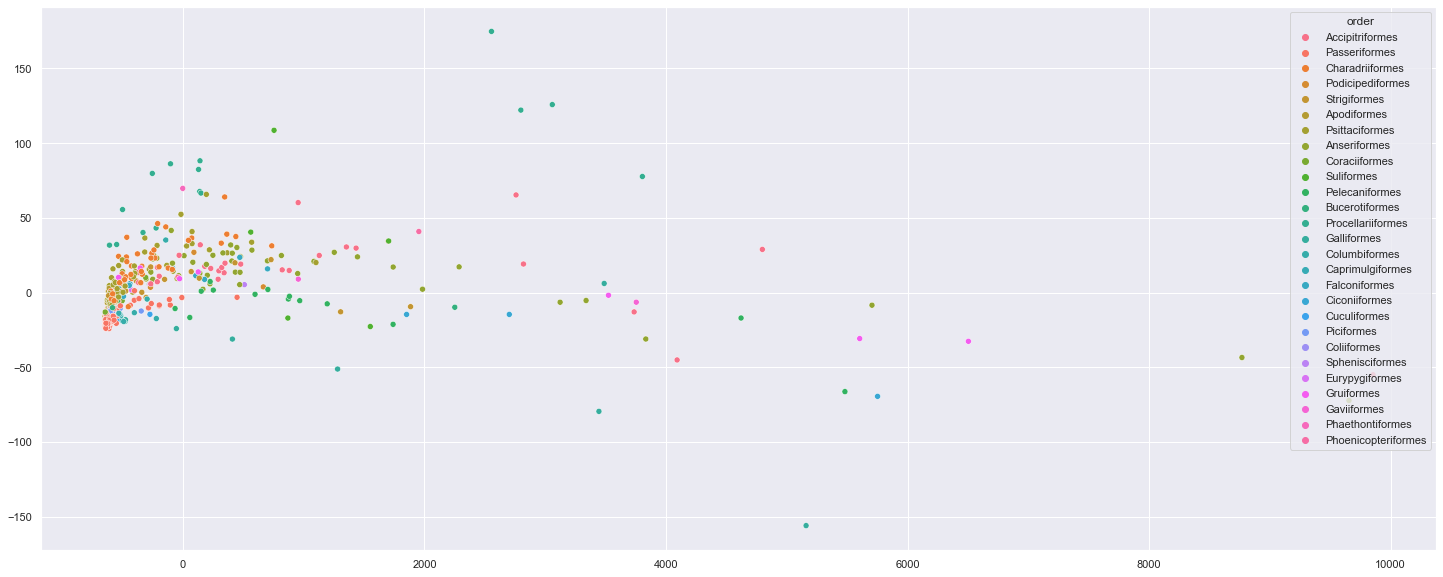

In [202]:

sns.set(rc={'figure.figsize':(25,10)})

pca = PCA(n_components=2)
pcadf = pca.fit_transform(dfh)

sns.scatterplot(x=pcadf[:,0],y=pcadf[:,1],hue=df['order'])

Due to PCA failing to separate different types of birds, Linear Discriminant Analysis will be tried to visualize next.

<AxesSubplot:>

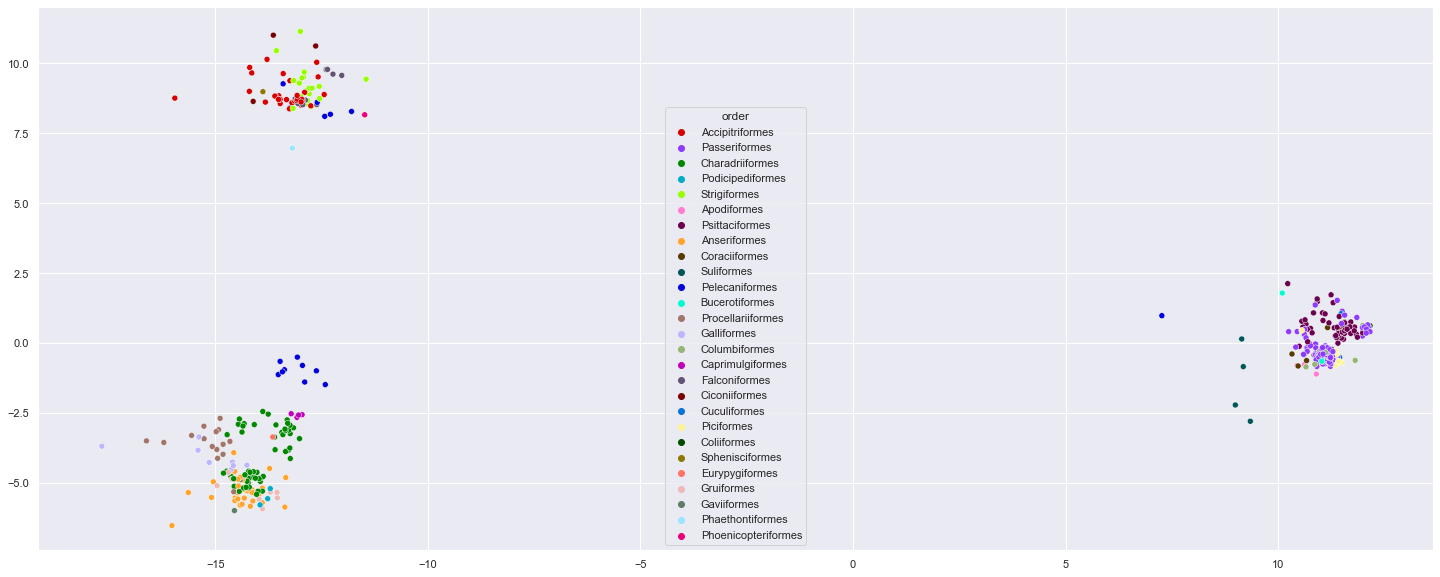

In [203]:

lda = LDA()
ldadf = lda.fit_transform(dfh, df["order"])
blobs, labels = make_blobs(n_samples=1000, centers=27, center_box=(-100, 100)) #https://stackoverflow.com/questions/68209351/how-to-make-a-color-map-with-many-unique-colors-in-seaborn
palette = sns.color_palette(cc.glasbey, n_colors=27) #needed to do different color palette because default sns palettes are for 12 colors.
sns.scatterplot(x=ldadf[:,0], y=ldadf[:,1], hue=df['order'],palette=palette)

It can be seen that LDA seperates the dataset to only three parts. But when 

In [204]:

aggclustering = AgglomerativeClustering(n_clusters=3)
aggdf = aggclustering.fit(dfh)
print(aggdf.labels_)

[1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1
 2 1 2 0 1 1 1 1 1 0 0 2 2 2 2 2 1 1 2 1 1 1 1 1 1 1 2 1 2 1 0 1 1 1 1 2 1
 1 2 0 1 2 2 2 1 1 1 2 0 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 0 1 1 1 1 1 1 1 1 1 2 2
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 0 0 0 1 1 2 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2
 2 0 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 2
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 2 1 1 1 0 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 0 0 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 1 1 1 1 1 0 1 1 1 

In [205]:
from collections import Counter
print(dict(Counter(aggdf.labels_)))

{1: 405, 2: 66, 0: 29}


In [206]:
dfh["Hierarchial Clusters"] = aggdf.labels_
dfh


,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP,Hierarchial Clusters
1,4.35,20.333333,29.75,32.00,4.86920,40.000,452.000000,0,0,1,0,0,1,0,1
2,3.50,22.000000,34.75,41.65,8.16368,58.000,988.750000,0,0,1,0,0,1,0,2
3,4.25,19.900000,33.00,24.25,2.31028,19.300,138.500000,0,0,1,0,0,1,0,1
5,4.20,10.083333,14.50,16.00,0.94276,3.150,30.175000,0,0,1,1,0,0,0,1
6,5.50,11.833333,13.50,13.50,0.46620,1.650,11.900000,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,4.07,14.916667,13.00,10.00,1.08780,2.770,25.350000,0,0,1,1,0,0,0,1
616,3.95,13.340000,12.60,10.00,1.00492,2.830,27.960000,0,0,1,1,0,0,0,1
617,3.00,5.600000,14.00,14.00,1.77156,7.300,79.225000,0,0,1,1,0,0,0,1
618,3.15,5.100000,11.00,10.00,0.55944,1.130,11.250000,0,0,1,1,0,0,0,1


### 2.2: Support Vector Machines

In [207]:
df.head()

,order,family,genus,spp,species,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,32.00,4.86920,40.00,452.000,0,0,1,0,0,1,0
2,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,41.65,8.16368,58.00,988.750,0,0,1,0,0,1,0
3,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,24.25,2.31028,19.30,138.500,0,0,1,0,0,1,0
5,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,16.00,0.94276,3.15,30.175,0,0,1,1,0,0,0
6,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,13.50,0.46620,1.65,11.900,0,0,1,1,0,0,0


In [208]:
def bootstrap(X,y,model):
    res = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)
        model.fit(X_train,y_train)
        res.append(model.score(X_test,y_test))
    tmp = sorted(res)[3:97]
    return (min(tmp),max(tmp))

In [209]:
clf = svm.SVC(kernel='linear') #best fit kernel, others fit around 0.3
y = df.iloc[:,0]
X = df.iloc[:,5:]
bootstrap(X,y,clf)

(0.72, 0.856)

It can be seen that SVM method is really good for predicting order of the species, it returns accuracy scores between %70 to %90. This great gap between scores is due to evenly split of bird species in orders. When some of bird orders have only two species in them, some of them have include dozens of species. A confusion matrix and classfication report of random test is presented below in order to addres this issue.

0.84


c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classif

                   precision    recall  f1-score   support

  Accipitriformes       1.00      0.64      0.78        11
     Anseriformes       1.00      0.89      0.94         9
      Apodiformes       0.00      0.00      0.00         1
   Bucerotiformes       0.00      0.00      0.00         1
  Charadriiformes       0.89      1.00      0.94         8
    Ciconiiformes       0.00      0.00      0.00         0
    Columbiformes       0.80      0.67      0.73         6
    Coraciiformes       1.00      0.50      0.67         4
     Cuculiformes       0.00      0.00      0.00         1
    Falconiformes       0.33      1.00      0.50         2
      Galliformes       1.00      1.00      1.00         3
      Gaviiformes       0.00      0.00      0.00         1
       Gruiformes       0.33      1.00      0.50         1
    Passeriformes       0.91      0.98      0.95        53
   Pelecaniformes       0.50      0.33      0.40         3
       Piciformes       1.00      1.00      1.00       

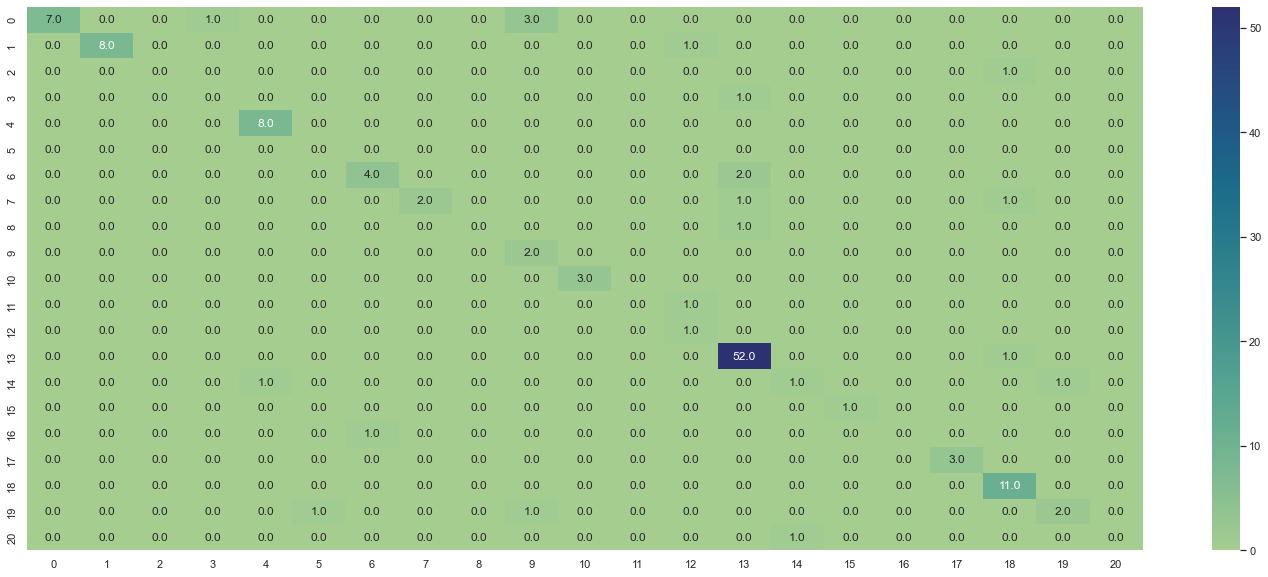

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)
clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(clf.score(X_test,y_test))
sns.heatmap(cm,annot=True,cmap= "crest",fmt=".1f")
print(classification_report(y_test,y_pred))

It can be seen that species are not evenly choosen.

## K-Means, Decision Tree and DBSCAN

### 3.1: K-Means

In [213]:
dfkm = dfh.drop("Hierarchial Clusters",axis = 1) #going back to hiearcihal dataset and removing old clusters
dfkm.head()

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,4.35,20.333333,29.75,32.00,4.86920,40.00,452.000,0,0,1,0,0,1,0
2,3.50,22.000000,34.75,41.65,8.16368,58.00,988.750,0,0,1,0,0,1,0
3,4.25,19.900000,33.00,24.25,2.31028,19.30,138.500,0,0,1,0,0,1,0
5,4.20,10.083333,14.50,16.00,0.94276,3.15,30.175,0,0,1,1,0,0,0
6,5.50,11.833333,13.50,13.50,0.46620,1.65,11.900,0,0,1,1,0,0,0


In [229]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3,init='random',algorithm='auto')
score = []
maximum = 0
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(dfkm,dfh['Hierarchial Clusters'],train_size=0.75)
    kmeans.fit(X_train)
    X_pred = kmeans.predict(X_test)
    score.append(metrics.accuracy_score(y_test,X_pred))
    if score[i]>maximum:
        maximum = score[i]
        maxpred = kmeans.predict(X)

score.sort(reverse = True)
mean = np.mean(score)
differences = np.abs(score - mean)
index = np.argmin(differences)
score = score[0:index]
print(min(score),max(score))

0.704 1.0


In [231]:

dfh["K Means' Clusters"] = maxpred
dfh.head()

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP,Hierarchial Clusters,K Means' Clusters
1,4.35,20.333333,29.75,32.00,4.86920,40.00,452.000,0,0,1,0,0,1,0,1,1
2,3.50,22.000000,34.75,41.65,8.16368,58.00,988.750,0,0,1,0,0,1,0,2,2
3,4.25,19.900000,33.00,24.25,2.31028,19.30,138.500,0,0,1,0,0,1,0,1,1
5,4.20,10.083333,14.50,16.00,0.94276,3.15,30.175,0,0,1,1,0,0,0,1,1
6,5.50,11.833333,13.50,13.50,0.46620,1.65,11.900,0,0,1,1,0,0,0,1,1


### 3.2: Decision Trees

In [232]:
df.head()

,order,family,genus,spp,species,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,Accipitriformes,Accipitridae,Accipiter,cooperii,Accipiter_cooperii,4.35,20.333333,29.75,32.00,4.86920,40.00,452.000,0,0,1,0,0,1,0
2,Accipitriformes,Accipitridae,Accipiter,gentilis,Accipiter_gentilis,3.50,22.000000,34.75,41.65,8.16368,58.00,988.750,0,0,1,0,0,1,0
3,Accipitriformes,Accipitridae,Accipiter,striatus,Accipiter_striatus,4.25,19.900000,33.00,24.25,2.31028,19.30,138.500,0,0,1,0,0,1,0
5,Passeriformes,Acrocephalidae,Acrocephalus,arundinaceus,Acrocephalus_arundinaceus,4.20,10.083333,14.50,16.00,0.94276,3.15,30.175,0,0,1,1,0,0,0
6,Passeriformes,Acrocephalidae,Acrocephalus,schoenobaenus,Acrocephalus_schoenobaenus,5.50,11.833333,13.50,13.50,0.46620,1.65,11.900,0,0,1,1,0,0,0


In [276]:
from sklearn import tree
decisiontree= tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
y = df.iloc[:,0]
X = df.iloc[:,5:]
bootstrap(X,y,decisiontree)

(0.648, 0.776)

[Text(697.5, 475.65000000000003, 'X[10] <= 0.5\nentropy = 3.409\nsamples = 375\nvalue = [25, 31, 4, 2, 3, 39, 3, 1, 10, 8, 3, 1, 9, 6\n1, 6, 132, 12, 1, 11, 2, 9, 41, 13, 2]'),
 Text(348.75, 339.75, 'X[12] <= 0.5\nentropy = 3.187\nsamples = 160\nvalue = [25, 31, 0, 0, 3, 39, 3, 0, 0, 0, 0, 1, 9, 6\n1, 6, 0, 11, 1, 0, 2, 9, 0, 13, 0]'),
 Text(174.375, 203.85000000000002, 'X[0] <= 4.075\nentropy = 2.455\nsamples = 104\nvalue = [0, 31, 0, 0, 3, 39, 0, 0, 0, 0, 0, 1, 0, 6\n1, 6, 0, 6, 0, 0, 2, 9, 0, 0, 0]'),
 Text(87.1875, 67.94999999999999, 'entropy = 2.131\nsamples = 67\nvalue = [0, 2, 0, 0, 3, 39, 0, 0, 0, 0, 0, 1, 0, 1\n1, 3, 0, 6, 0, 0, 2, 9, 0, 0, 0]'),
 Text(261.5625, 67.94999999999999, 'entropy = 0.96\nsamples = 37\nvalue = [0, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5\n0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(523.125, 203.85000000000002, 'X[2] <= 29.125\nentropy = 2.073\nsamples = 56\nvalue = [25, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 9, 0\n0, 0, 0, 5, 1, 0, 0, 0, 0, 13, 0]'),
 Text(435.

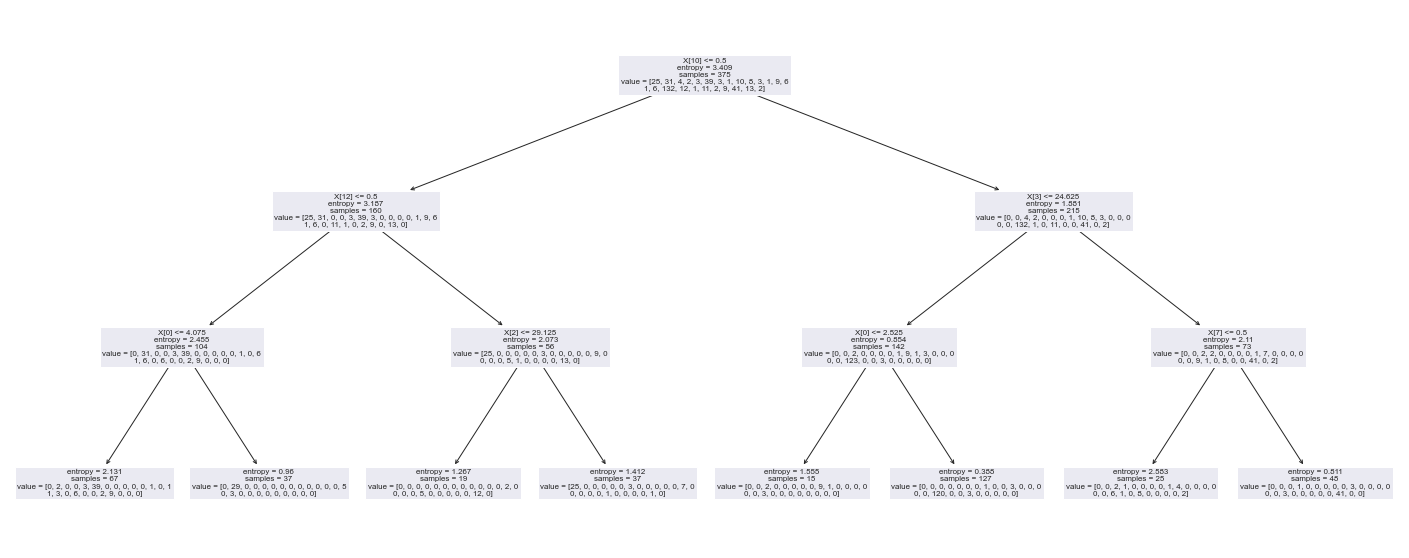

In [277]:
tree.plot_tree(decisiontree)

### 3.3: DBSCAN

dfh

In [285]:
dfh

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP,Hierarchial Clusters,K Means' Clusters
1,4.35,20.333333,29.75,32.00,4.86920,40.000,452.000000,0,0,1,0,0,1,0,1,1
2,3.50,22.000000,34.75,41.65,8.16368,58.000,988.750000,0,0,1,0,0,1,0,2,2
3,4.25,19.900000,33.00,24.25,2.31028,19.300,138.500000,0,0,1,0,0,1,0,1,1
5,4.20,10.083333,14.50,16.00,0.94276,3.150,30.175000,0,0,1,1,0,0,0,1,1
6,5.50,11.833333,13.50,13.50,0.46620,1.650,11.900000,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,4.07,14.916667,13.00,10.00,1.08780,2.770,25.350000,0,0,1,1,0,0,0,1,1
616,3.95,13.340000,12.60,10.00,1.00492,2.830,27.960000,0,0,1,1,0,0,0,1,1
617,3.00,5.600000,14.00,14.00,1.77156,7.300,79.225000,0,0,1,1,0,0,0,1,1
618,3.15,5.100000,11.00,10.00,0.55944,1.130,11.250000,0,0,1,1,0,0,0,1,1


In [287]:
dfdbscan = dfh.drop(['Hierarchial Clusters',"K Means' Clusters"], axis =1)
dfdbscan.head()

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP
1,4.35,20.333333,29.75,32.00,4.86920,40.00,452.000,0,0,1,0,0,1,0
2,3.50,22.000000,34.75,41.65,8.16368,58.00,988.750,0,0,1,0,0,1,0
3,4.25,19.900000,33.00,24.25,2.31028,19.30,138.500,0,0,1,0,0,1,0
5,4.20,10.083333,14.50,16.00,0.94276,3.15,30.175,0,0,1,1,0,0,0
6,5.50,11.833333,13.50,13.50,0.46620,1.65,11.900,0,0,1,1,0,0,0


In [401]:
from sklearn.cluster import DBSCAN
import operator
listdict = []
for i in np.arange(0.25, 15, 0.25):
    for j in range(3,15):
        dbscan = DBSCAN(eps =i ,min_samples=j,algorithm="auto").fit(dfdbscan)
        listdict.append( dict(Counter(dbscan.labels_)))

listdict.sort(key=operator.itemgetter(-1))
print(*listdict, sep = "\n ")

{-1: 223, 0: 255, 1: 3, 2: 6, 3: 3, 4: 5, 5: 5}
 {-1: 225, 0: 249, 1: 3, 2: 6, 3: 5, 4: 3, 5: 5, 6: 4}
 {-1: 225, 0: 254, 1: 3, 2: 6, 3: 3, 4: 5, 5: 4}
 {-1: 231, 0: 246, 1: 3, 2: 6, 3: 5, 4: 3, 5: 3, 6: 3}
 {-1: 237, 0: 33, 1: 213, 2: 3, 3: 5, 4: 3, 5: 3, 6: 3}
 {-1: 240, 2: 8, 0: 213, 1: 25, 3: 5, 5: 3, 4: 3, 6: 3}
 {-1: 240, 0: 33, 1: 213, 2: 5, 4: 3, 3: 3, 5: 3}
 {-1: 240, 0: 36, 1: 213, 3: 5, 2: 6}
 {-1: 241, 0: 36, 1: 213, 3: 5, 2: 5}
 {-1: 241, 0: 36, 1: 213, 3: 5, 2: 5}
 {-1: 244, 3: 8, 0: 209, 2: 4, 1: 24, 4: 5, 6: 3, 5: 3}
 {-1: 244, 1: 32, 0: 214, 3: 5, 2: 5}
 {-1: 247, 1: 30, 0: 214, 3: 6, 2: 3}
 {-1: 247, 0: 31, 1: 213, 3: 6, 2: 3}
 {-1: 248, 0: 209, 4: 4, 1: 21, 2: 7, 3: 5, 6: 3, 5: 3}
 {-1: 249, 0: 209, 4: 3, 1: 21, 2: 7, 3: 5, 6: 3, 5: 3}
 {-1: 249, 0: 209, 4: 3, 1: 21, 2: 7, 3: 5, 6: 3, 5: 3}
 {-1: 249, 1: 28, 0: 214, 3: 5, 2: 4}
 {-1: 250, 2: 4, 0: 213, 1: 24, 3: 5, 4: 4}
 {-1: 250, 1: 29, 0: 213, 2: 5, 3: 3}
 {-1: 250, 1: 29, 0: 213, 2: 5, 3: 3}
 {-1: 251, 0: 209, 4:

It can clearly be seen that DBSCAN is not the correct algorithm for this dataset. More than half of the rows in the dataset are classified as noise for each epsilon value between 0.25 to 15 and minimum samples between 3 to 15. Furthermore, all other avaliable metrics are tried for the model but left from the notebook for the sake of space. DBSCAN fails to cluster the dataset like K-means or Hierarchial Clustering do, because of that, it is not fit to this dataset.

## CONCLUSION

In [402]:
dfclusters = dfh
dfh

,clutch.size,max.longevity,incubation,fledging.age,brain.mass,egg.mass,body.mass,specimen.origin_captivity,specimen.origin_unknown,specimen.origin_wild,dev.mode_A,dev.mode_P,dev.mode_SA,dev.mode_SP,Hierarchial Clusters,K Means' Clusters
1,4.35,20.333333,29.75,32.00,4.86920,40.000,452.000000,0,0,1,0,0,1,0,1,1
2,3.50,22.000000,34.75,41.65,8.16368,58.000,988.750000,0,0,1,0,0,1,0,2,2
3,4.25,19.900000,33.00,24.25,2.31028,19.300,138.500000,0,0,1,0,0,1,0,1,1
5,4.20,10.083333,14.50,16.00,0.94276,3.150,30.175000,0,0,1,1,0,0,0,1,1
6,5.50,11.833333,13.50,13.50,0.46620,1.650,11.900000,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,4.07,14.916667,13.00,10.00,1.08780,2.770,25.350000,0,0,1,1,0,0,0,1,1
616,3.95,13.340000,12.60,10.00,1.00492,2.830,27.960000,0,0,1,1,0,0,0,1,1
617,3.00,5.600000,14.00,14.00,1.77156,7.300,79.225000,0,0,1,1,0,0,0,1,1
618,3.15,5.100000,11.00,10.00,0.55944,1.130,11.250000,0,0,1,1,0,0,0,1,1
